## Observations and Insights 

In [2]:
%matplotlib inline

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# Combine the data into a single dataset
mouse_data_combined = pd.merge(mouse_metadata, study_results, on = "Mouse ID" )
# Display the data table for preview
mouse_data_combined.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Checking the number of mice.
mice_count = len(mouse_data_combined["Mouse ID"].unique())
mice_count

249

In [8]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = mouse_data_combined.groupby(['Mouse ID'])['Timepoint'].agg(list).reset_index(name='Duplicate Mouse ID')
dup_mice_id

,Mouse ID,Duplicate Mouse ID
0,a203,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
1,a251,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
2,a262,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
3,a275,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
4,a366,"[0, 5, 10, 15, 20, 25, 30]"
...,...,...
244,z435,"[0, 5, 10]"
245,z578,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
246,z581,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"
247,z795,"[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]"


In [9]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_id_time= mouse_data_combined[mouse_data_combined.duplicated(subset = ['Mouse ID', 'Timepoint'], keep=False)]
dup_mice_id_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [10]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_data_time = mouse_data_combined.drop_duplicates (subset=["Mouse ID", "Timepoint"], keep = 'last').reset_index(drop = True)
clean_mouse_data_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


In [11]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = len(clean_mouse_data_time["Mouse ID"])
clean_mice_count

1888

## Summary Statistics

In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [13]:
regimen_grouped_mean = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
regimen_grouped_mean = regimen_grouped_mean.rename(columns= {"Tumor Volume (mm3)": "Mean"}).round(2)
regimen_grouped_mean

,Mean
Drug Regimen,
Capomulin,40.68
Ceftamin,52.59
Infubinol,52.88
Ketapril,55.24
Naftisol,54.33
Placebo,54.03
Propriva,52.38
Ramicane,40.22
Stelasyn,54.23


In [14]:
regimen_grouped_median = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
regimen_grouped_median = regimen_grouped_median.rename(columns= {"Tumor Volume (mm3)": "Median"}).round(2)
regimen_grouped_median

,Median
Drug Regimen,
Capomulin,41.56
Ceftamin,51.78
Infubinol,51.82
Ketapril,53.70
Naftisol,52.51
Placebo,52.29
Propriva,50.78
Ramicane,40.67
Stelasyn,52.43


In [15]:
regimen_grouped_variance = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
regimen_grouped_variance = regimen_grouped_variance.rename(columns= {"Tumor Volume (mm3)": "Variance"}).round(2)
regimen_grouped_variance

,Variance
Drug Regimen,
Capomulin,24.95
Ceftamin,39.29
Infubinol,43.13
Ketapril,68.55
Naftisol,66.17
Placebo,61.17
Propriva,43.22
Ramicane,23.49
Stelasyn,59.45


In [16]:
regimen_grouped_std = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
regimen_grouped_std = regimen_grouped_std.rename(columns= {"Tumor Volume (mm3)": "StD"}).round(2)
regimen_grouped_std

,StD
Drug Regimen,
Capomulin,4.99
Ceftamin,6.27
Infubinol,6.57
Ketapril,8.28
Naftisol,8.13
Placebo,7.82
Propriva,6.57
Ramicane,4.85
Stelasyn,7.71


In [17]:
regimen_grouped_SEM = clean_mouse_data_time[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
regimen_grouped_SEM = regimen_grouped_SEM.rename(columns= {"Tumor Volume (mm3)": "SEM"}).round(2)
regimen_grouped_SEM

,SEM
Drug Regimen,
Capomulin,0.33
Ceftamin,0.47
Infubinol,0.49
Ketapril,0.60
Naftisol,0.60
Placebo,0.58
Propriva,0.53
Ramicane,0.32
Stelasyn,0.57


In [18]:
regimen_grouped_stats1 = pd.merge(regimen_grouped_mean, regimen_grouped_median, on="Drug Regimen")

In [19]:
regimen_grouped_stats2 = pd.merge(regimen_grouped_stats1, regimen_grouped_variance, on= "Drug Regimen")

In [20]:
regimen_grouped_stats3 = pd.merge(regimen_grouped_stats2, regimen_grouped_std, on= "Drug Regimen")

In [21]:
regimen_grouped_stats = pd.merge(regimen_grouped_stats3, regimen_grouped_SEM, on= "Drug Regimen")

In [22]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_grouped_stats

# Using the aggregation method, produce the same summary statistics in a single line


,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [23]:
regimen_grouped_stats.aggregate(func = list, axis = 0)

,Mean,Median,Variance,StD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


## Bar and Pie Charts

In [24]:
clean_mouse_data_time

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1883,z969,Naftisol,Male,9,30,25,63.145652,2
1884,z969,Naftisol,Male,9,30,30,65.841013,3
1885,z969,Naftisol,Male,9,30,35,69.176246,4
1886,z969,Naftisol,Male,9,30,40,70.314904,4


<AxesSubplot:>

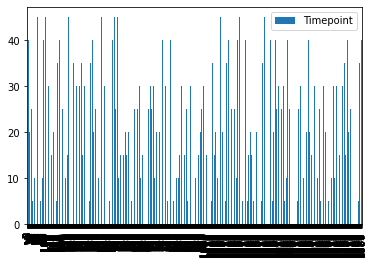

In [29]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_mouse_data_time[['Drug Regimen', 'Timepoint']].plot.bar()

In [26]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.



In [27]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas



In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [60]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [61]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [62]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [64]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
